Once the epmc parser has run for the first time, we have to check how it looked do some stats to get a rough idea on how things were going. 

In [10]:
import pyspark.sql
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext
import re

global spark

# SparkContext.setSystemProperty('spark.executor.memory', '20g')

spark = (pyspark.sql.SparkSession
    .builder
    .appName("phenodigm_parser")
    .config("spark.executor.memory", '10g')
     .config("spark.driver.bindAddress", "localhost")
    .config("spark.driver.memory", '10g')
    .getOrCreate()
)

#   

print('Spark version: ', spark.version)
epmc_evid_file = '/Users/dsuveges/project_data/epmc_evidence/epmc-2021-03-22.json.gz/part-00000-dcff14cd-0b11-4b4f-a4ed-a72201564888-c000.json.gz'

epmc_evid = (
    spark.read.json(epmc_evid_file)
    .withColumn("sentence_count", size(col('textMiningSentences')))
    .select(col('diseaseFromSourceMappedId'), 
        col('diseaseFromSource'), 
        col('targetFromSource'),
        col('targetFromSourceId'), 
        col('resourceScore'), 
        col('literature').getItem(0).alias('pmid'),
        col('sentence_count')
   )
    .write.parquet('epmc.chunk.parquet')
)


Spark version:  3.0.0


In [11]:
import pandas as pd

df = pd.read_parquet('epmc.chunk.parquet')
df.head()

,diseaseFromSourceMappedId,diseaseFromSource,targetFromSource,targetFromSourceId,resourceScore,pmid,sentence_count
0,EFO_0000294,bladder tumors,VEGF,ENSG00000112715,2.0,10022687,3
1,EFO_0000309,Burkitt lymphoma,c-MYC,ENSG00000136997,10.0,10022853,2
2,HP_0001943,hypoglycemia,GHRH,ENSG00000118702,3.0,10024084,1
3,EFO_0000222,acute myeloid leukemia,LRP,ENSG00000123384,10.0,10025900,5
4,EFO_0001645,CAD,HMG-CoA reductase,ENSG00000113161,2.0,10026704,1


In [14]:
df.loc[df.sentence_count > 100 ]

,diseaseFromSourceMappedId,diseaseFromSource,targetFromSource,targetFromSourceId,resourceScore,pmid,sentence_count
45134,EFO_0000182,Hepatocellular Carcinoma,PTP4A3,ENSG00000184489,10.0,PMC3528959,195
47590,MONDO_0007254,breast tumors,ERBB2,ENSG00000141736,2.0,PMC4091153,125
47743,EFO_0000549,insulinomas,Chromogranin A,ENSG00000100604,10.0,PMC4130880,131
48712,EFO_0000616,tumor,p53,ENSG00000141510,3.0,PMC4335025,313
49512,EFO_0009187,IPF,FGF1,ENSG00000113578,3.0,PMC4495640,107
53091,EFO_0000616,Tumor,L-selectin,ENSG00000188404,10.0,PMC5199197,147
53859,EFO_0001663,prostate cancer,PSA,ENSG00000141279,5.0,PMC5359887,315
53861,EFO_0000685,autoimmune arthritis,CD4,ENSG00000010610,10.0,PMC5359925,111
54904,EFO_0000616,tumor,PD-L1,ENSG00000120217,10.0,PMC5522039,128
54980,MONDO_0015917,glioma,SMC4,ENSG00000113810,10.0,PMC5533949,114


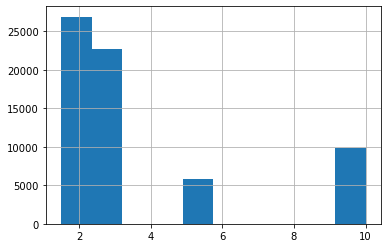

In [15]:
df.resourceScore.hist()